In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [4]:
import biff
import sys
sys.path.append('../')
import coefficients_smoothing
import pygadgetreader
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib
import jellyfish
import mwlmc_denity_shape_bfe as mshape
from scipy.interpolate import interp1d

In [5]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [6]:
rho = mshape.load_density_grid('../../data/interim/rho_mwlmc_bfe.txt', 101)

In [7]:
#x_grid = np.linspace(-400, 400, 101)
#y_grid = np.linspace(-400, 400, 101)
#z_grid = np.linspace(-400, 400, 101)
x_grid, y_grid, z_grid = mshape.grid_points(101, -400, 400, dim='3d')


In [8]:
x_grid2, y_grid2 = mshape.grid_points(101, -400, 400, dim='2d')


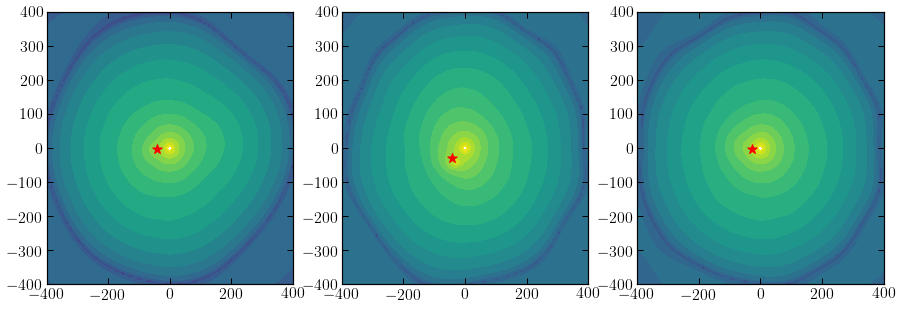

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

## y-x
ax[0].contourf(x_grid2, y_grid2, np.log10(np.abs(rho[:,:,50])), 20)
ax[0].scatter(-41, -1, marker='*', c='r', s=100)

## y-z
ax[1].contourf(x_grid2, y_grid2, np.log10(np.abs(rho[50,:,:])), 20)
ax[1].scatter(-41, -28, marker='*', c='r', s=100)

## x-z
ax[2].contourf(x_grid2, y_grid2, np.log10(np.abs(rho[:,50,:])), 20)
ax[2].scatter(-28, -1, marker='*', c='r', s=100)

<IPython.core.display.Javascript object>


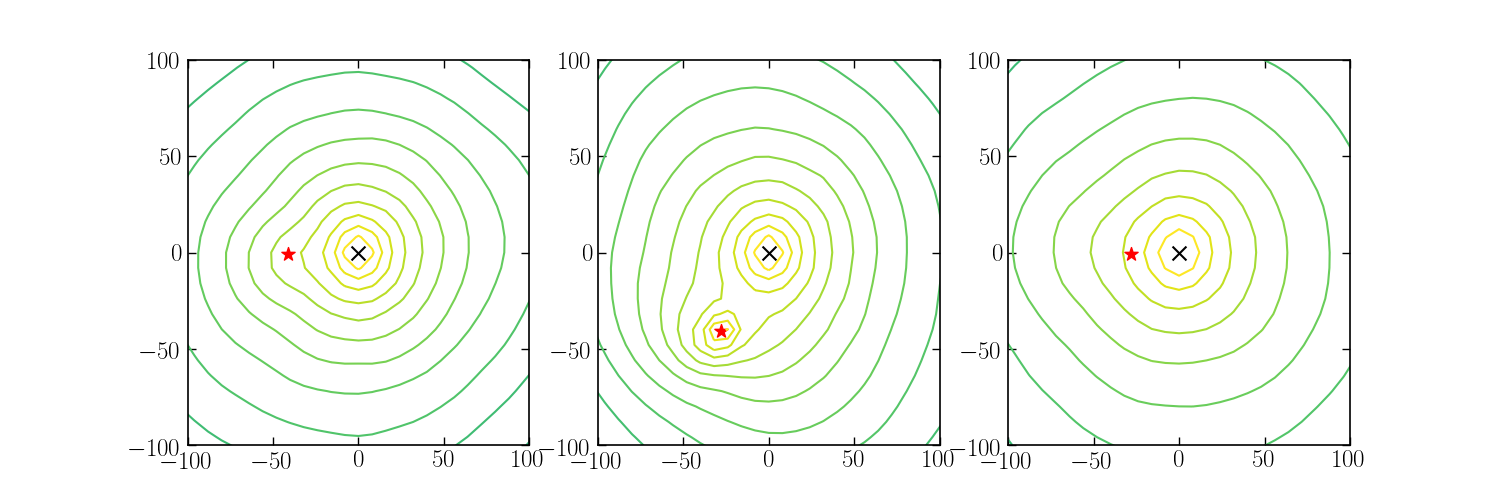

(-100, 100)

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

## y-x
ax[0].contour(x_grid2, y_grid2, np.log10(np.abs(rho[:,:,50])), 30)
ax[0].scatter(-41, -1, marker='*', c='r', s=100)
ax[0].scatter(0, 0, marker='x', c='k', s=100)
ax[0].set_xlim(-100, 100)
ax[0].set_ylim(-100, 100)

## y-z
ax[1].contour(x_grid2, y_grid2, np.log10(np.abs(rho[50,:,:])), 30)
ax[1].scatter(-28, -41, marker='*', c='r', s=100)
ax[1].scatter(0, 0, marker='x', c='k', s=100)
ax[1].set_xlim(-100, 100)
ax[1].set_ylim(-100, 100)
## x-z
ax[2].contour(x_grid2, y_grid2, np.log10(np.abs(rho[:,50,:])), 30)
ax[2].scatter(-28, -1, marker='*', c='r', s=100)
ax[2].scatter(0, 0, marker='x', c='k', s=100)
ax[2].set_xlim(-100, 100)
ax[2].set_ylim(-100, 100)


In [67]:
def plot_elli_fit(xgrid, ygrid, zgrid, pos_elli):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')
    r_shell = int(np.median(np.sqrt(pos_elli[:,:,0]**2 + pos_elli[:,:,1]**2 + pos_elli[:,:,2]**2)))
    ax.set_title('{} kpc'.format(r_shell))
    ax.scatter(xgrid, ygrid, zgrid, marker='.', color='k', s=2, 
               alpha=0.7)
    ax.plot_wireframe(pos_elli[:,:,0], pos_elli[:,:,1], pos_elli[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)
    return r_shell


def twod_fits_plot(xgrid, ygrid, zgrid, xgrid_fit, ygrid_fit, zgrid_fit):
    x_data1, y_data1 = jellyfish.shapes.twod_surface(xgrid, ygrid)
    x_data2, y_data2 = jellyfish.shapes.twod_surface(xgrid, zgrid)
    y_data3, z_data3 = jellyfish.shapes.twod_surface(ygrid, zgrid)
    
    x_fit1, y_fit1 = jellyfish.shapes.twod_surface(xgrid_fit, ygrid_fit)
    x_fit2, y_fit2 = jellyfish.shapes.twod_surface(xgrid_fit, zgrid_fit)
    y_fit3, z_fit3 = jellyfish.shapes.twod_surface(ygrid_fit, zgrid_fit)
    
    return [x_data1, y_data1, x_data2, y_data2, y_data3, z_data3], [x_fit1, y_fit1, x_fit2, y_fit2, y_fit3, z_fit3]

def likelihood(pos, axis):
    assert np.shape(pos)[-1] == 3, 'Error with the dimensions of the positions array axis[-1]=3'
    a = axis[0]
    b = axis[1]
    c = axis[2]
    assert a>=b>=c, 'Error: Check order of axis lengths'
    fit = pos[:,0]**2/a**2 + pos[:,1]**2/b**2 + pos[:,2]**2/c**2
    chi2 = np.sum(1 - fit)**2
    L = - 0.5 * chi2
    return chi2


In [68]:
rho_contours, r_ell, N_dots_r = mshape.compute_density_contour(rho, 45, x_grid, y_grid, z_grid)

/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:81: RuntimeWarning: invalid value encountered in greater_equal
  index_dens =  np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low)
/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:82: RuntimeWarning: invalid value encountered in less_equal
  & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))


In [69]:
print(len(r_ell), r_ell)

12 [262.541425302751, 236.5079279855117, 208.153789300123, 177.62882648939615, 149.02348808157726, 125.47509713086498, 105.52724766618336, 88.36288813749809, 72.8834686331544, 58.787753826796276, 47.32863826479693, 37.52332607858744]


In [70]:
N_dots_r

[42188, 37459, 31752, 23739, 14074, 7891, 4872, 3110, 1789, 1046, 603, 341]

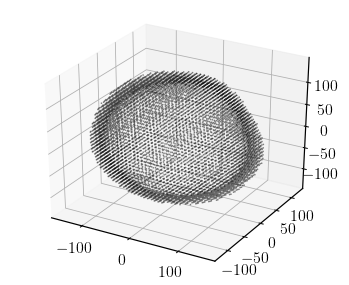

In [14]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[rho_contours[5]], y_grid[rho_contours[5]]
           , z_grid[rho_contours[5]], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

In [71]:
n_contours = len(r_ell)
eigves = np.zeros((n_contours ,3, 3))
axis = np.zeros((n_contours ,3))
s = np.zeros(n_contours)
q = np.zeros(n_contours)
pos_ell = []

for i in range(len(r_ell)):
    print(i)
    eigves[i], axis[i], s[i], q[i] = mshape.compute_halo_shape(rho_contours[i], x_grid, y_grid, z_grid)
    pos_elli = jellyfish.ellipse_3dcartesian(axis[i], eigves[i])
    pos_ell.append(pos_elli)

0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


1
2
3
4
5
6
7
8
9
10
11


In [16]:
VC_t = (1-0.9**2)/(1-0.8**2)

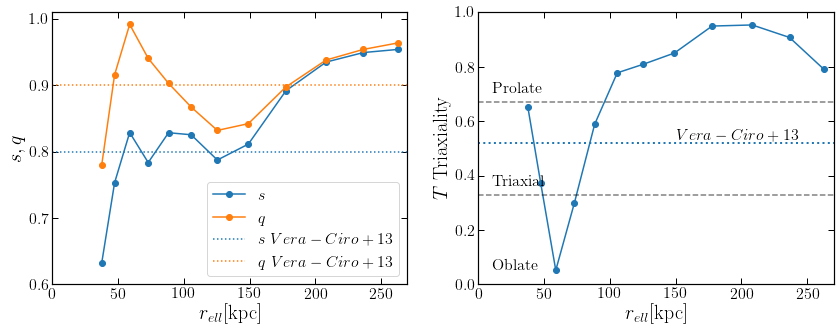

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(r_ell, s, '-o', label='$s$')
ax[0].plot(r_ell, q, '-o', label='$q$')

ax[0].axhline(0.8, label=r'$s\ Vera-Ciro+13$', c='C0', ls=':')
ax[0].axhline(0.9, label=r'$q\ Vera-Ciro+13$', c='C1', ls=':')

ax[0].set_ylim(0.6, 1.01)
ax[0].set_xlim(0, 270)
ax[0].legend()
ax[0].set_xlabel(r'$r_{ell}\rm{[kpc]}$')
ax[0].set_ylabel(r'$s, q$')


ax[1].plot(r_ell, (1-q**2)/(1-s**2), '-o')
ax[1].axhline(0.67, c='k', ls='--', alpha=0.5)
ax[1].axhline(0.33, c='k', ls='--', alpha=0.5)
ax[1].text(10, 0.05, r'$\rm{Oblate}$')
ax[1].text(10, 0.36, r'$\rm{Triaxial}$')
ax[1].text(10, 0.7, r'$\rm{Prolate}$')
ax[1].axhline(0.52, c='C0', ls=':', lw=2)
ax[1].text(150, 0.53, r'$Vera-Ciro+13$')

ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 270)
ax[1].set_xlabel(r'$r_{ell}\rm{[kpc]}$')
ax[1].set_ylabel(r'$T\ \rm{Triaxiality}$')


plt.savefig('shape_mwlmc5_vera_ciro.pdf', bbox_inches='tight')

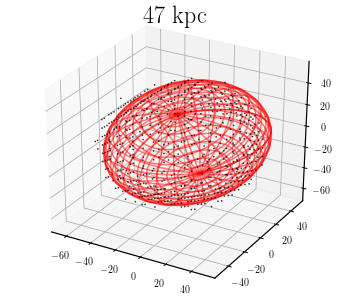

In [300]:
r_s_3 = plot_elli_fit(x_grid[rho_contours[10]], y_grid[rho_contours[10]], z_grid[rho_contours[10]], pos_ell[10])


In [73]:
data_2d_all = []
fit_2d_all = []
for i in range(n_contours):
    data_2d, fit_2d = twod_fits_plot(x_grid[rho_contours[i]].flatten(), y_grid[rho_contours[i]].flatten(),
                                           z_grid[rho_contours[i]].flatten(), pos_ell[i][:,:,0].flatten(), 
                                           pos_ell[i][:,:,1].flatten(), pos_ell[i][:,:,2].flatten())
    data_2d_all.append(data_2d)
    fit_2d_all.append(fit_2d)

In [18]:
len(data_2d_all)

12

Text(0.5,0,'$x \\rm{[kpc]}$')

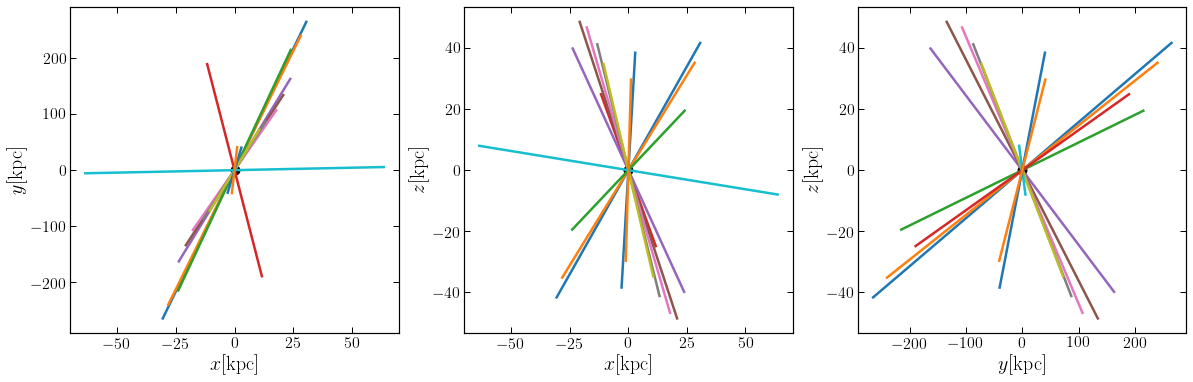

In [95]:
#colors = ['C0', 'C1', 'C2']
fig, ax = plt.subplots(1, 3, figsize=(20,6))

j=0
for i in range(0,n_contours):
    ax[0].plot([-x_pa[i],x_pa[i]], [-y_pa[i], y_pa[i]], lw=2.5)
    j+=1
j=0
for i in range(0,n_contours):
    ax[1].plot([-x_pa[i],x_pa[i]], [-z_pa[i],z_pa[i]], lw=2.5)
    j+=1
j=0
for i in range(0,n_contours):
    ax[2].plot([-y_pa[i],y_pa[i]], [-z_pa[i],z_pa[i]], lw=2.5)
    j+=1
    
    
ax[0].scatter(0, 0, marker='o', s=80, c='k')
ax[2].scatter(0, 0, marker='o', s=80, c='k')
ax[1].scatter(0, 0, marker='o', s=80, c='k')

ax[2].set_xlabel(r'$y \rm{[kpc]}$')
ax[2].set_ylabel(r'$z \rm{[kpc]}$')


ax[1].set_xlabel(r'$x \rm{[kpc]}$')
ax[1].set_ylabel(r'$z \rm{[kpc]}$')


ax[0].set_ylabel(r'$y \rm{[kpc]}$')
ax[0].set_xlabel(r'$x \rm{[kpc]}$') 


In [74]:
col = plt.cm.plasma_r(np.linspace(0, 1, n_contours))    

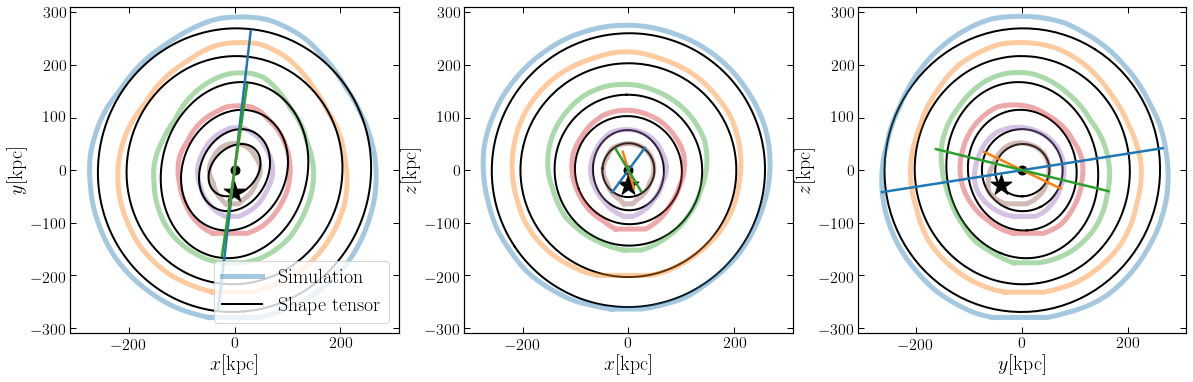

In [97]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))

for i in range(0,len(data_2d_all),2):
    
        
    xd = data_2d_all[i][1]
    yd = data_2d_all[i][0]
  
    theta = np.arctan2(xd, yd)
    r = np.sqrt(np.array(xd)**2 + np.array(yd)**2)
    s = np.argsort(theta)
    f = interp1d(theta[s], r[s])
    
    theta2 = np.linspace(np.min(theta), np.max(theta), 100)
    r2 = f(theta2)
    
    x2 = r2*np.sin(theta2)
    y2 = r2*np.cos(theta2)
    x2 = hstack((x2, x2[0]))
    y2 = hstack((y2, y2[0]))
    
    
    if i==0:
        ax[0].plot(x2, y2, lw=5, alpha=0.4, label=r'$\rm{Simulation}$')
        ax[0].plot(fit_2d_all[i][1], fit_2d_all[i][0], lw=2, label=r'$\rm{Shape\ tensor}$', ls='-', c='k')

    elif i>0:
        ax[0].plot(x2, y2, lw=5, alpha=0.4)
        ax[0].plot(fit_2d_all[i][1], fit_2d_all[i][0], lw=2, ls='-', c='k')

ax[0].set_xlim(-310, 310)
ax[0].set_ylim(-310, 310)

ax[0].legend(fontsize=20)


for i in range(0, len(data_2d_all), 2):
    #ax[1].plot(data_2d_all[i][4], data_2d_all[i][5], lw=2, c='C0')
    ax[1].plot(fit_2d_all[i][4], fit_2d_all[i][5], lw=2, ls='-', c='k')
    
    
    xd = data_2d_all[i][4]
    yd = data_2d_all[i][5]
  
    theta = np.arctan2(xd, yd)
    r = np.sqrt(np.array(xd)**2 + np.array(yd)**2)
    s = np.argsort(theta)
    f = interp1d(theta[s], r[s])
    
    theta2 = np.linspace(np.min(theta), np.max(theta), 100)
    r2 = f(theta2)
    
    x2 = r2*np.sin(theta2)
    y2 = r2*np.cos(theta2)
    x2 = hstack((x2, x2[0]))
    y2 = hstack((y2, y2[0]))
    
    ax[1].plot(x2, y2, lw=5, alpha=0.4)

ax[1].set_xlim(-310, 310)
ax[1].set_ylim(-310, 310)    

for i in range(0, len(data_2d_all), 2):
    #ax[2].plot(data_2d_all[i][3], data_2d_all[i][2], lw=2, c='C0')
    ax[2].plot(fit_2d_all[i][3], fit_2d_all[i][2], lw=2, ls='-', c='k')
    xd = data_2d_all[i][3]
    yd = data_2d_all[i][2]
  
    theta = np.arctan2(xd, yd)
    r = np.sqrt(np.array(xd)**2 + np.array(yd)**2)
    s = np.argsort(theta)
    f = interp1d(theta[s], r[s])
    
    theta2 = np.linspace(np.min(theta), np.max(theta), 100)
    r2 = f(theta2)
    
    x2 = r2*np.sin(theta2)
    y2 = r2*np.cos(theta2)
    x2 = hstack((x2, x2[0]))
    y2 = hstack((y2, y2[0]))
    
    ax[2].plot(x2, y2, lw=5, alpha=0.4)

ax[2].set_xlim(-310, 310)
ax[2].set_ylim(-310, 310)

ax[2].set_xlabel(r'$y \rm{[kpc]}$')
ax[2].set_ylabel(r'$z \rm{[kpc]}$')


ax[1].set_xlabel(r'$x \rm{[kpc]}$')
ax[1].set_ylabel(r'$z \rm{[kpc]}$')


ax[0].set_ylabel(r'$y \rm{[kpc]}$')
ax[0].set_xlabel(r'$x \rm{[kpc]}$') 

colors = ['C0', 'C1', 'C2']
j=0
for i in range(0,n_contours, 4):
    ax[0].plot([-x_pa[-i],x_pa[-i]], [-y_pa[-i], y_pa[-i]], lw=2.5, c=colors[j])
    j+=1
j=0
for i in range(0,n_contours, 4):
    ax[1].plot([-x_pa[-i],x_pa[-i]], [-z_pa[-i],z_pa[-i]], lw=2.5, c=colors[j])
    j+=1
j=0
for i in range(0,n_contours, 4):
    ax[2].plot([-y_pa[-i],y_pa[-i]], [-z_pa[-i],z_pa[-i]], lw=2.5, c=colors[j])
    j+=1

ax[0].scatter(-1, -41, marker='*', s=480, c='k')
ax[2].scatter(-41, -28, marker='*', s=480, c='k')
ax[1].scatter(-1, -28, marker='*', s=480, c='k')

ax[0].scatter(0, 0, marker='o', s=80, c='k')
ax[2].scatter(0, 0, marker='o', s=80, c='k')
ax[1].scatter(0, 0, marker='o', s=80, c='k')


plt.savefig('MWLMC5_shape_dens_contours.pdf', bbox_inches='tight')

In [359]:
r_ell[:8]

[262.541425302751,
 236.5079279855117,
 208.153789300123,
 177.62882648939615,
 149.02348808157726,
 125.47509713086498,
 105.52724766618336,
 88.36288813749809]

In [358]:
r_ell[7:]

[88.36288813749809,
 72.8834686331544,
 58.787753826796276,
 47.32863826479693,
 37.52332607858744]

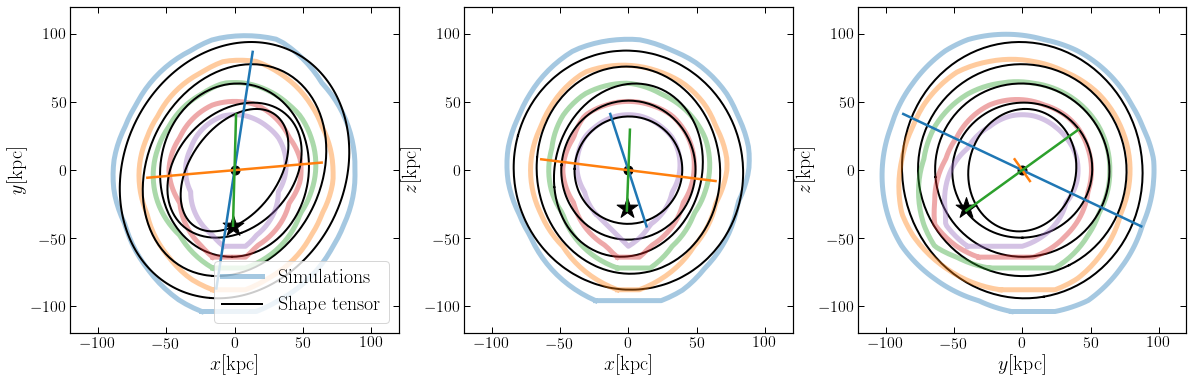

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))

init_i = 7
for i in range(init_i,len(data_2d_all)):
    
    xd = data_2d_all[i][1]
    yd = data_2d_all[i][0]
  
    theta = np.arctan2(xd, yd)
    r = np.sqrt(np.array(xd)**2 + np.array(yd)**2)
    s = np.argsort(theta)
    f = interp1d(theta[s], r[s])
    
    theta2 = np.linspace(np.min(theta), np.max(theta), 100)
    r2 = f(theta2)
    
    x2 = r2*np.sin(theta2)
    y2 = r2*np.cos(theta2)
    x2 = hstack((x2, x2[0]))
    y2 = hstack((y2, y2[0]))
    
    if i==7:
        ax[0].plot(x2, y2, label=r'$\rm{Simulations}$', lw=5, alpha=0.4)
        ax[0].plot(fit_2d_all[i][1], fit_2d_all[i][0], lw=2, label=r'$\rm{Shape\ tensor}$', ls='-', c='k')

    elif i!=7:
        ax[0].plot(x2, y2, lw=5, alpha=0.4)
        ax[0].plot(fit_2d_all[i][1], fit_2d_all[i][0], lw=2, ls='-', c='k')
        

ax[0].set_xlim(-120, 120)
ax[0].set_ylim(-120, 120)

ax[0].legend(fontsize=20)


for i in range(init_i, len(data_2d_all)):
    xd = data_2d_all[i][4]
    yd = data_2d_all[i][5]
  
    theta = np.arctan2(xd, yd)
    r = np.sqrt(np.array(xd)**2 + np.array(yd)**2)
    s = np.argsort(theta)
    f = interp1d(theta[s], r[s])
    
    theta2 = np.linspace(np.min(theta), np.max(theta), 100)
    r2 = f(theta2)
    
    x2 = r2*np.sin(theta2)
    y2 = r2*np.cos(theta2)
    x2 = hstack((x2, x2[0]))
    y2 = hstack((y2, y2[0]))
    
    ax[1].plot(x2, y2, lw=5, alpha=0.4)
    ax[1].plot(fit_2d_all[i][4], fit_2d_all[i][5], lw=2, ls='-', c='k')

ax[1].set_xlim(-120, 120)
ax[1].set_ylim(-120, 120)

for i in range(init_i, len(data_2d_all)):
    xd = data_2d_all[i][3]
    yd = data_2d_all[i][2]
  
    theta = np.arctan2(xd, yd)
    r = np.sqrt(np.array(xd)**2 + np.array(yd)**2)
    s = np.argsort(theta)
    f = interp1d(theta[s], r[s])
    
    theta2 = np.linspace(np.min(theta), np.max(theta), 200)
    r2 = f(theta2)
    
    x2 = r2*np.sin(theta2)
    y2 = r2*np.cos(theta2)
    x2 = hstack((x2, x2[0]))
    y2 = hstack((y2, y2[0]))
    ax[2].plot(x2, y2, lw=5, alpha=0.4)
    ax[2].plot(fit_2d_all[i][3], fit_2d_all[i][2], lw=2, ls='-', c='k')

colors = ['C0', 'C1', 'C2', 'C3', 'C4']
j=0
for i in range(init_i,n_contours, 2):
    ax[0].plot([-x_pa[i],x_pa[i]], [-y_pa[i],y_pa[i]], c=colors[j], lw=2.5)
    ax[1].plot([-x_pa[i],x_pa[i]], [-z_pa[i],z_pa[i]], c=colors[j], lw=2.5)
    ax[2].plot([-y_pa[i],y_pa[i]], [-z_pa[i],z_pa[i]], c=colors[j], lw=2.5)
    j+=1
    
ax[2].set_xlim(-120, 120)
ax[2].set_ylim(-120, 120)

ax[2].set_xlabel(r'$y\rm{[kpc]$')
ax[2].set_ylabel(r'$z\rm{[kpc]$')


ax[1].set_xlabel(r'$x\rm{[kpc]$')
ax[1].set_ylabel(r'$z\rm{[kpc]$')


ax[0].set_ylabel(r'$y\rm{[kpc]$')
ax[0].set_xlabel(r'$x\rm{[kpc]$')


ax[0].scatter(-1, -41, marker='*', s=480, c='k')
ax[2].scatter(-41, -28, marker='*', s=480, c='k')
ax[1].scatter(-1, -28, marker='*', s=480, c='k')

ax[0].scatter(0, 0, marker='o', s=80, c='k')
ax[2].scatter(0, 0, marker='o', s=80, c='k')
ax[1].scatter(0, 0, marker='o', s=80, c='k')

plt.savefig('MWLMC5_shape_dens_contours_inner_100.pdf', bbox_inches='tight')

## Principal axis angle:

In [331]:
print(n_contours)

12


In [408]:
axis

array([[270.02180962, 260.28044067, 257.65096185],
       [244.40055604, 233.21907826, 232.05521593],
       [217.179908  , 203.76130993, 203.0912204 ],
       [191.5226723 , 171.92306789, 170.82649394],
       [169.52747783, 142.78398864, 137.55675311],
       [144.25100312, 120.02568188, 113.58154126],
       [118.07364071, 102.40594842,  97.46749694],
       [ 97.26889759,  87.83781154,  80.59403671],
       [ 80.99794779,  76.19503329,  63.47094202],
       [ 64.45004756,  63.9290036 ,  53.41744104],
       [ 55.80959452,  51.12145155,  42.03440646],
       [ 50.61375037,  39.47193625,  31.98612015]])

In [407]:
print(r_ell)

[262.541425302751, 236.5079279855117, 208.153789300123, 177.62882648939615, 149.02348808157726, 125.47509713086498, 105.52724766618336, 88.36288813749809, 72.8834686331544, 58.787753826796276, 47.32863826479693, 37.52332607858744]


In [457]:
# Inntermidiate axis
print(' x ', ' y ', ' z :')
print('------------')

for i in range(n_contours):
    print('{:1.0f}, {:1.0f}, {:1.0f}'.format((eigves[i][:,1]*axis[i][1])[1],
                                             (eigves[i][:,1]*axis[i][1])[0], 
                                             (eigves[i][:,1]*axis[i][1])[2]))


 x   y   z :
------------
-37, 44, -254
-61, 40, -222
-194, 27, -55
136, 22, -103
11, 32, 139
4, 40, 113
2, 41, 94
1, 38, 79
1, 33, 69
6, 18, 61
5, 35, -37
5, 23, -32


In [460]:
# Minor axis
print(' x ', ' y ', ' z :')
print('------------')

for i in range(n_contours):
    print('({:1.0f}, {:1.0f}, {:1.0f})'.format(np.abs(eigves[i][:,2]*axis[i][2])[1],
                                             np.abs(eigves[i][:,2]*axis[i][2])[0], 
                                             np.abs(eigves[i][:,2]*axis[i][2])[2]))


 x   y   z :
------------
(253, 23, 41)
(222, 17, 64)
(56, 11, 195)
(104, 11, 135)
(136, 21, 6)
(112, 17, 2)
(96, 14, 4)
(80, 10, 4)
(63, 8, 3)
(6, 51, 14)
(42, 4, 1)
(32, 3, 3)


In [76]:
x_pa = np.zeros(n_contours)
y_pa = np.zeros(n_contours)
z_pa = np.zeros(n_contours)

for i in range(n_contours):
    y_pa[i], x_pa[i], z_pa[i] = eigves[i][:,0]*axis[i][0]
    

In [417]:
print(x_pa[::-1])
print(y_pa[::-1])
print(z_pa[::-1])

[  1.12667522   2.91442393  63.70819656  10.58681422  13.27764746
  17.77686348  20.79188119  23.78401228 -11.67770676  24.00791964
  28.26249864  30.64012214]
[ 40.92589481  40.23192006   5.57134095  72.35164092  87.03590639
 106.9008912  134.1749124  163.02209641 189.53201704 214.96375997
 240.1809696  265.00020725]
[ 29.75825035  38.56954216  -8.00215478 -34.84001962 -41.3484403
 -46.87821685 -48.71491004 -39.97102176  24.9435299   19.5272663
  35.29822668  41.80730493]


In [296]:
for i in range(n_contours):
    print(eigves[i][:,0])

[0.98140297 0.11347277 0.15482936]
[0.98273496 0.11564008 0.14442777]
[0.9897958  0.11054393 0.08991286]
[ 0.98960616 -0.06097297  0.130238  ]
[ 0.96162639  0.14029591 -0.23577902]
[ 0.9301489   0.14413682 -0.33770933]
[ 0.90537474  0.15055743 -0.39702525]
[ 0.89479688  0.13650455 -0.42509416]
[ 0.89325277  0.13070472 -0.4301346 ]
[ 0.08644433  0.98848952 -0.12416057]
[0.7208782  0.05222084 0.6910916 ]
[0.80859242 0.02226026 0.58794794]


In [19]:
# transformation to Galactic coordinates
from astropy.coordinates import SkyCoord
from astropy import units as u



In [162]:
def cart_galactic(pos):
    c_gal = SkyCoord(pos, representation='cartesian', frame='galactocentric')
    c_gal.representation = 'spherical'

    ## to degrees and wrapping l

    l_degrees = c_gal.lon.wrap_at(180 * u.deg).radian
    b_degrees = c_gal.lat.radian

    return l_degrees, b_degrees

In [163]:
l_pa, b_pa = cart_galactic(np.array([x_pa, y_pa, z_pa]).T)
l_lmc, b_lmc = cart_galactic(np.array([[-1], [-41], [-28]]))

## Add the wake here and the LMC orbit

In [103]:
from mwlmc_bfe import smooth_coeff
from mpl_toolkits.basemap import Basemap


In [318]:
covmat_mw_path = '../../data/interim/BFE/MW/bfe_MW_81_MWLMC5_100M_new_b1_covmat_sample_'
coeff_mw_path =  '../../data/interim/BFE/MW/bfe_MW_81_MWLMC5_100M_new_b1_coeff_sample_'

covmat_mwlmc_path = '../../data/interim/BFE/MWLMC3/bfe_MWLMC_unbound_81_MWLMC3_100M_new_b1_covmat_sample_'
coeff_mwlmc_path =  '../../data/interim/BFE/MWLMC3/bfe_MWLMC_unbound_81_MWLMC3_100M_new_b1_coeff_sample_'

#mass = 1.7995383e-05
mass = 1.577212515257997438e-06

In [319]:
S_mw, T_mw, N_mw = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 5, 20, 20, 20, 5, mass, snap=110, sn_out=0)
S_mwlmc, T_mwlmc, N_mwlmc = smooth_coeff(coeff_mwlmc_path, covmat_mwlmc_path, 0, 5, 20, 20, 20, 5, mass, snap=90, sn_out=0)

../coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [322]:
S_mw_wake = np.copy(S_mw)
T_mw_wake = np.copy(T_mw)
S_mw_wake[0,0,0] = 0
T_mw_wake[0,0,0] = 0


S_mwlmc_wake = np.copy(S_mwlmc)
T_mwlmc_wake = np.copy(T_mwlmc)
S_mwlmc_wake[0,0,0] = 0
T_mwlmc_wake[0,0,0] = 0

In [309]:
lat = np.linspace(-90, 10, 100)
lon = np.linspace(-180, 180, 100)
L, B = np.meshgrid(lon, lat)

In [131]:
def spherical_grid(L, B, d):
    d = SkyCoord(L*u.degree, B*u.degree, representation='spherical', frame='galactocentric', distance=d*u.kpc)
    x = d.cartesian.x.value
    y = d.cartesian.y.value
    z = d.cartesian.z.value
    xyz = np.ascontiguousarray(np.array([x.flatten(), y.flatten(), z.flatten()]).T)
    return xyz

In [316]:
xyz_50 = spherical_grid(L, B, 50)
xyz_70 = spherical_grid(L, B, 70)
xyz_100 = spherical_grid(L, B, 100)
xyz_150 = spherical_grid(L, B, 150)
xyz_200 = spherical_grid(L, B, 200)

In [ ]:
## Look for the effect of the wake and debris.. 
## 3 x 2 pannel with 3 distances of the wake and debris projection?

262.541425302751


/usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


236.5079279855117
208.153789300123
177.62882648939615
149.02348808157726
125.47509713086498
105.52724766618336
88.36288813749809
72.8834686331544
58.787753826796276
47.32863826479693
37.52332607858744


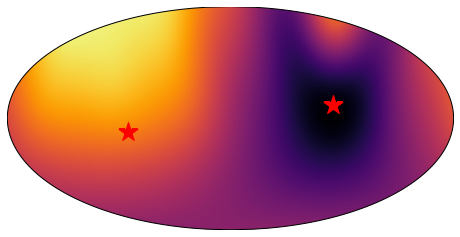

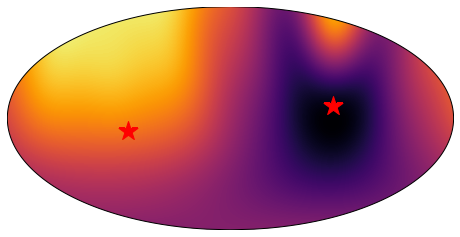

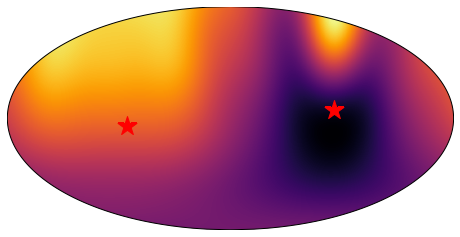

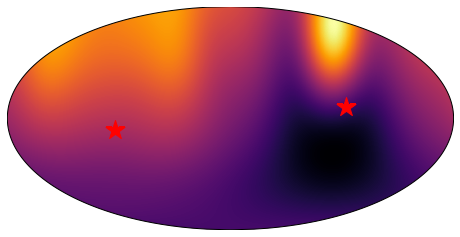

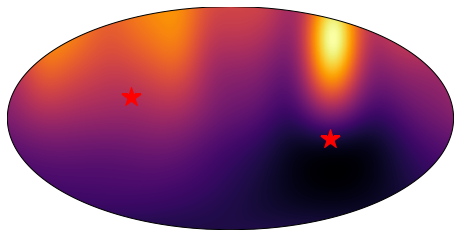

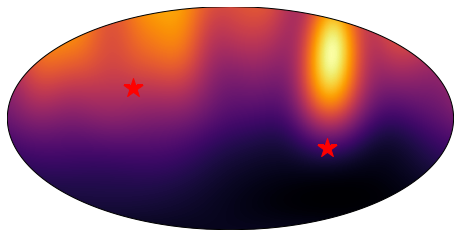

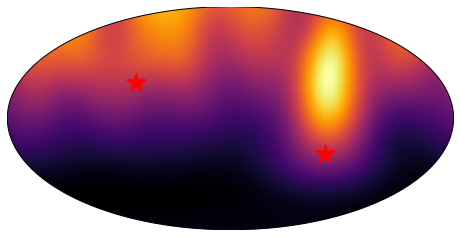

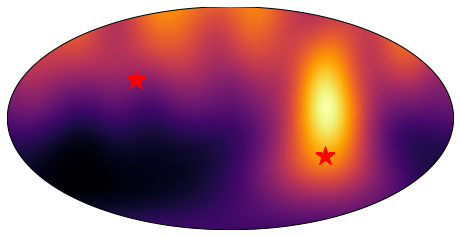

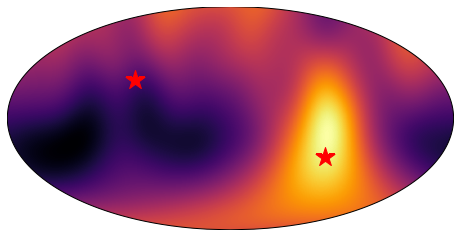

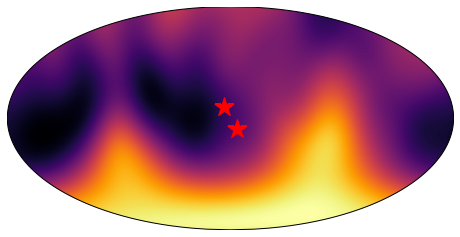

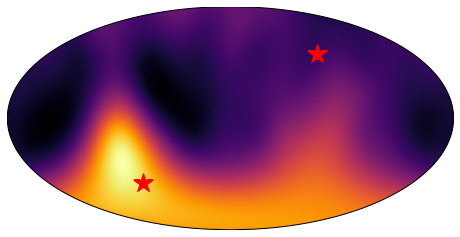

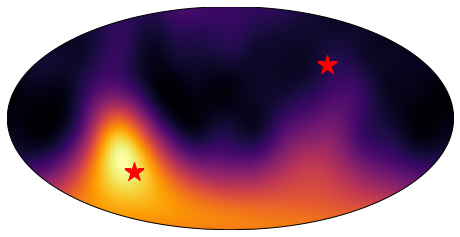

In [327]:
for i in range(len(r_ell)):
    xyz = spherical_grid(L, B, r_ell[i])
    print(r_ell[i])
    rho_bfe = biff.density(xyz, S_mw, T_mw, M=1, r_s=40.85)
    #rho_mon = biff.density(xyz, S_mw, T_mw, M=1, r_s=40.85)

    fig = figure(figsize=(8, 4.5)) 
    m = Basemap(projection='moll',lon_0=0, lat_0=0)
    im=m.imshow(rho_bfe.reshape(100, 100), origin='lower', interpolation='gaussian', 
                cmap='inferno')
    l_pa_m, b_pa_m = m(l_pa[i]*180/np.pi, b_pa[i]*180/np.pi)
    l_pa_mm, b_pa_mm = m(-l_pa[i]*180/np.pi, -b_pa[i]*180/np.pi)
    m.scatter(l_pa_m, b_pa_m, marker='*', c='r', s=400)
    m.scatter(l_pa_mm, b_pa_mm, marker='*', c='r', s=400)
    

/usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


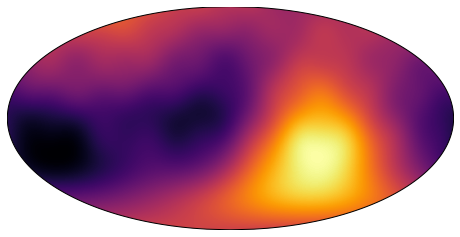

In [159]:
fig = figure(figsize=(8, 4.5)) 
m = Basemap(projection='moll',lon_0=0, lat_0=0)
im=m.imshow(rho_bfe_70.reshape(100, 100), origin='lower', interpolation='gaussian', cmap='inferno')


In [135]:
rho_bfe_70 = biff.density(xyz_70, S_mw_wake, T_mw_wake, M=1, r_s=40.85)
rho_bfe_100 = biff.density(xyz_100, S_mw_wake, T_mw_wake, M=1, r_s=40.85)
rho_bfe_150 = biff.density(xyz_150, S_mw_wake, T_mw_wake, M=1, r_s=40.85)
rho_bfe_200 = biff.density(xyz_200, S_mw_wake, T_mw_wake, M=1, r_s=40.85)

In [102]:
orbit = np.loadtxt('/home/xzk/work/github/MW_anisotropy/data/orbits/LMC5_100Mb1_orbit.txt')


In [103]:
LMCx = orbit[:,6]
LMCy = orbit[:,7]
LMCz = orbit[:,8]
MWx = orbit[:,0]
MWy = orbit[:,1]
MWz = orbit[:,2]
LMC = np.array([LMCx-MWx, LMCy-MWy, LMCz-MWz]).T
MW = np.array([MWx, MWy, MWz]).T

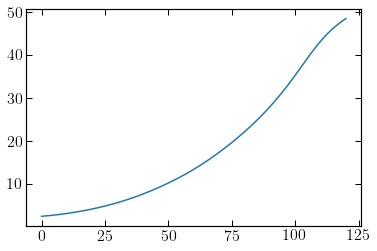

In [106]:
plot(np.sqrt(MW[:-30, 1]**2+MW[:-30, 2]**2+MW[:-30, 0]**2))

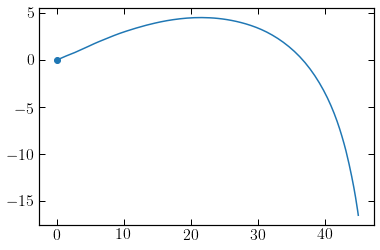

In [113]:
plot(MW[:-20, 1]-MW[0,1],MW[:-20, 2]-MW[0,2])
scatter(0,0)

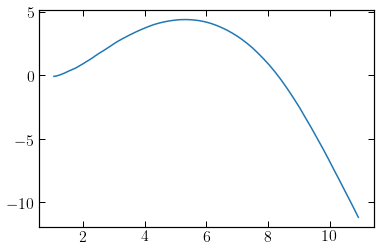

In [108]:
plot(MW[:-30, 0],MW[:-30, 2])

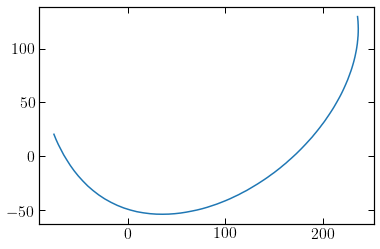

In [423]:
plot(LMC[:-30,1], LMC[:-30,2])

In [190]:
Llmc, Blmc = cart_galactic(LMC)

In [23]:
col = plt.cm.plasma_r(np.linspace(0, 1, n_contours))    

In [298]:
f = interp1d(Llmc[np.argsort(Llmc)], Blmc[argsort(Llmc)])
l_lmc_interp = np.linspace(np.min(Llmc), np.max(Llmc), 2000)
b_lmc_interp = f(l_lmc_interp)

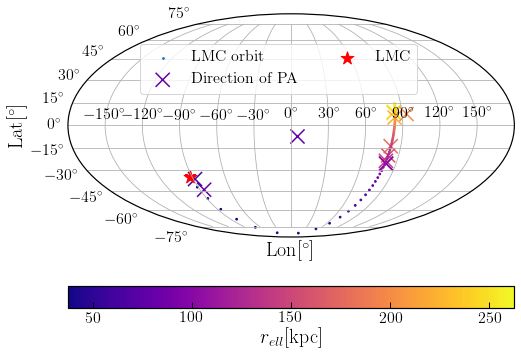

In [351]:
fig = plt.figure(figsize=(8,6))
plt.subplot(111, projection='mollweide')

plt.scatter(l_pa[:-3], b_pa[:-3], c=col[:-3], marker='x', s=200)
#plt.scatter(l_pa[-2:], b_pa[-2:], marker='o', c=col[-3:])

plt.scatter(Llmc[40:110], Blmc[40:110], c=np.sqrt(np.sum(LMC[40:110]**2, axis=1)), cmap='plasma', 
            s=3, label='LMC orbit')

#plt.scatter(l_lmc_interp[140:2000], b_lmc_interp[140:2000], s=1,c=)

plt.scatter(-l_pa[-2:], -b_pa[-2:], c=col[-3:], s=200, marker='x', label='Direction of PA')
plt.scatter(l_pa[-3], b_pa[-3], marker='x', c=col[-3], s=200)
plt.scatter(l_lmc, b_lmc, marker='*', c='r', s=180, label=r'$\rm{LMC}$')

plt.grid()
plt.xlabel(r'$\rm{Lon}[^{\circ}]$')
plt.ylabel(r'$\rm{Lat}[^{\circ}]$')

plt.legend(ncol=2, bbox_to_anchor=(0.8, 0.9))
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.plasma)
sm.set_array(np.linspace(np.min(r_ell), np.max(r_ell)))
cbar = plt.colorbar(sm, orientation='horizontal')
cbar.set_label(r'$r_{ell}\rm{[kpc]}$')

plt.savefig('principal_axis_galactic_mollweide.pdf', bbox_inches='tight')

# Think about this likelihood

## Likeihood 

In [333]:
axis

array([[270.02180962, 260.28044067, 257.65096185],
       [244.40055604, 233.21907826, 232.05521593],
       [217.179908  , 203.76130993, 203.0912204 ],
       [191.5226723 , 171.92306789, 170.82649394],
       [169.52747783, 142.78398864, 137.55675311],
       [144.25100312, 120.02568188, 113.58154126],
       [118.07364071, 102.40594842,  97.46749694],
       [ 97.26889759,  87.83781154,  80.59403671],
       [ 80.99794779,  76.19503329,  63.47094202],
       [ 64.45004756,  63.9290036 ,  53.41744104],
       [ 55.80959452,  51.12145155,  42.03440646],
       [ 50.61375037,  39.47193625,  31.98612015]])

(-300, 300)

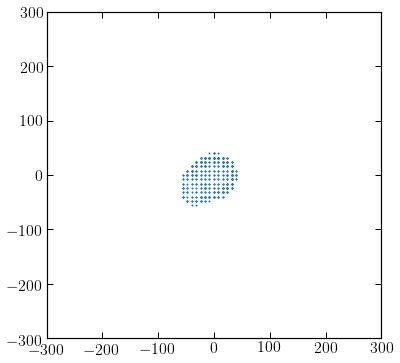

In [343]:
figure(figsize=(6,6))
scatter(x_grid[rho_contours[-1]], z_grid[rho_contours[-1]], s=1)
xlim(-300, 300)
ylim(-300, 300)

1. Are you sure axis is in the right order of x, y, z?
2. Inner parts of the halo have way less data points, this should affect the results from the shape tensor.

Thoughts:

1. Interpolate data at every distance and see how the results of shape and the likelihood change as a function of 
number of points in the interpolation
2. Compute high-resolution grid

In [383]:
rho_contours2, r_ell2, N_dots_r2 = mshape.compute_density_contour(rho, 44, x_grid, y_grid, z_grid)

/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:81: RuntimeWarning: invalid value encountered in greater_equal
  index_dens =  np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low)
/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:82: RuntimeWarning: invalid value encountered in less_equal
  & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))


In [384]:
print(len(r_ell2))

11


In [331]:
L_r = np.zeros(len(s))
for i in range(len(s)):
    L_r[i] = likelihood(np.array([x_grid[rho_contours[i]], y_grid[rho_contours[i]], 
                                  z_grid[rho_contours[i]]]).T, axis[i])

In [387]:
r_ell[4:6]

[149.02348808157726, 125.47509713086498]

Text(0,0.5,'$\\chi^2$')

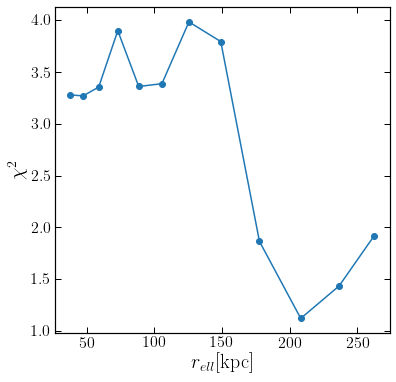

In [332]:
plt.figure(figsize=(6,6))
plt.plot(r_ell, np.log10(L_r), '-o')
plt.xlabel(r'$r_{ell}\rm{[kpc]}$')
plt.ylabel(r'$\chi^2$')
#plt.xlim(0, 280)
#plt.savefig('chi2.pdf', bbox_inches='tight')

In [354]:
x_grid, y_grid, z_grid = mshape.grid_points(101, -150, 150, dim='3d')


In [355]:
len(x_grid.flatten())

1030301

In [ ]:
xyz_grid = np.ascontiguousarray(np.array([x_grid.flatten(), y_grid.flatten(), z_grid.flatten()]))


In [388]:
# M31 position in the sky

In [392]:
c = SkyCoord(ra="00h42m44.3s", dec="+41°16′9″", frame='icrs', distance=778*u.kpc)

In [394]:
c.galactocentric.spherical

<SphericalRepresentation (lon, lat, distance) in (deg, deg, kpc)
    (121.79531544, -21.35806922, 782.02929902)>

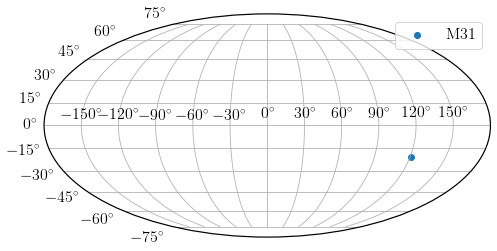

In [406]:
fig = plt.figure(figsize=(8,6))
plt.subplot(111, projection='mollweide')
plt.scatter(121/180*np.pi, -21/180*np.pi, label='M31')
plt.legend()
plt.grid()

## COM contours

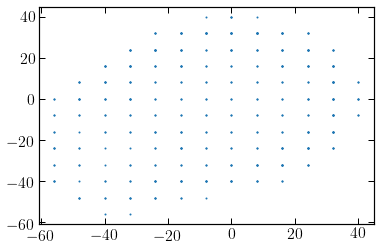

In [26]:
scatter(x_grid[rho_contours[-1]], z_grid[rho_contours[-1]], s=1)

In [28]:
from jellyfish import com

In [47]:
com_density = np.zeros((3, len(r_ell)))
for i in range(len(r_ell)):
    xyz_contour = np.array([x_grid[rho_contours[i]], y_grid[rho_contours[i]], z_grid[rho_contours[i]]]).T
    com_density[:,i] = com.COM(xyz_contour, xyz_contour, np.ones(len(xyz_contour[:,0])))[0]
    

In [53]:
r_ell

[262.541425302751,
 236.5079279855117,
 208.153789300123,
 177.62882648939615,
 149.02348808157726,
 125.47509713086498,
 105.52724766618336,
 88.36288813749809,
 72.8834686331544,
 58.787753826796276,
 47.32863826479693,
 37.52332607858744]

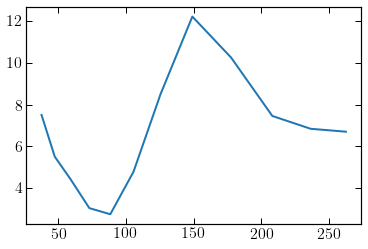

In [62]:
plot(r_ell, np.sqrt(np.sum(com_density**2, axis=0)), lw=2)

In [100]:
com_density.T

array([[-5.42277425, -2.65383521,  2.90414336],
       [-5.4352759 , -2.46990042,  3.33591393],
       [-5.57596372, -2.68808264,  4.15469892],
       [-5.50924639, -3.17148995,  8.05830069],
       [-3.65155606, -2.23561177, 11.45488134],
       [-1.63629451, -0.89418325,  8.28893676],
       [-1.03119869, -0.90640394,  4.57471264],
       [-1.64630225, -0.45530547,  2.13504823],
       [-2.79932923,  0.10732253, -1.14924539],
       [-2.45506692,  0.        , -3.69407266],
       [-4.40464345, -0.29187396, -3.27694859],
       [-6.42815249, -0.16422287, -3.87096774]])